In [83]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE
import AE_Stats
from load_data_fn import load_data,load_data_no_filter,prep_ttbar

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
import importlib


In [242]:
import importlib
importlib.reload(AE_Stats)

<module 'AE_Stats' from '/uscms_data/d3/nswood/Notebooks/ECON_AE_Development/AE_Stats.py'>

In [2]:
n = 80

arr = torch.load('TTBAR/ttbar_1_greater_0_sim')
if n > 0:
    for i in range(n):
        arr = torch.vstack([arr,torch.load(f'TTBAR/ttbar_{int(n+2)}_greater_0_sim')])



In [3]:
print(f'There are {len(arr)} wafers with sim energy > 0 ')
print(f'mean calcq is: {torch.mean(arr[:,0:48])}')
print(f'max calcq is: {torch.max(arr[:,0:48])}')

There are 892079 wafers with sim energy > 0 
mean calcq is: 16.369503009262633
max calcq is: 10788.0


In [108]:
dt_1 = []
dt_2 = []
dt_3 = []

for a in arr:
    
    if a[-4].item() ==0.: 
        dt_1.append(a)
    elif a[-4].item() ==1.0: 
        dt_2.append(a)
    else:
        dt_3.append(a)
    
dt_1 = torch.vstack(dt_1).float()
dt_2 = torch.vstack(dt_2).float()   
dt_3 = torch.vstack(dt_3).float()   

In [43]:
print(f'{len(dt_1)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_1)}')

432654 wafers of type 0
mean calcq: 23.924360275268555


In [44]:
print(f'{len(dt_2)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_2)}')

325153 wafers of type 0
mean calcq: 6.844508171081543


In [45]:
print(f'{len(dt_3)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_3)}')

134272 wafers of type 0
mean calcq: 3.5711145401000977


In [124]:
sum_dt = torch.sum(dt_1[:,0:48],dim=1)
mean = torch.mean((sum_dt))
std = torch.std((sum_dt))
labels = (sum_dt-mean)/std

In [125]:
mean

tensor(1324.8364)

In [128]:
labels

tensor([-1.0680, -1.3847, -0.4070,  ..., -1.3643, -0.4441, -1.5161])

In [119]:
sum_dt

tensor([ 748.,  577., 1105.,  ...,  588., 1085.,  506.])

In [153]:
adj_labels = []

for l in labels:
    if l.item() < 0.1: 
        adj_labels.append(1)
    elif l.item() <0.5:
        adj_labels.append(2)
    elif l.item() < 0.75:
        adj_labels.append(3)
    elif l.item() <1:
        adj_labels.append(4)
    elif l.item() <2:
        adj_labels.append(5)
    else:
        adj_labels.append(6)
adj_labels = torch.tensor(adj_labels)
test_label = adj_labels[-size_test:]

In [150]:
adj_labels

tensor([1, 1, 1,  ..., 1, 1, 1])

# Scale Calc_Q by sim_energy

In [56]:
dt_1[:,0:48] = (dt_1[:,0:48])*torch.unsqueeze(dt_1[:,-5],dim=1)
dt_2[:,0:48] = (dt_2[:,0:48])*torch.unsqueeze(dt_2[:,-5],dim=1)
dt_3[:,0:48] = (dt_3[:,0:48])*torch.unsqueeze(dt_3[:,-5],dim=1)

In [70]:
dt_1[:,0:48] = (dt_1[:,0:48] - torch.mean(dt_1[:,0:48]))/torch.std(dt_1[:,0:48])
dt_2[:,0:48] = (dt_2[:,0:48] - torch.mean(dt_2[:,0:48]))/torch.std(dt_2[:,0:48])
dt_3[:,0:48] = (dt_3[:,0:48] - torch.mean(dt_3[:,0:48]))/torch.std(dt_3[:,0:48])

In [7]:
dt_with_sim =torch.hstack([dt_1[:,0:48],torch.unsqueeze(dt_1[:,-5],dim=1)])

In [71]:

size_train =100000
size_test = 50000
train_loc = dt_1[0:size_train]
test_loc = dt_1[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=50,
    shuffle=False
)

test_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=50,
    shuffle=False
)

train = dt_1[0:size_train,0:48]
test = dt_1[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=50,
    shuffle=False
)

test_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=50,
    shuffle=False
)

In [72]:
size_train =90000
size_test = 10000
train_loc = dt_2[0:size_train]
test_loc = dt_2[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=50,
    shuffle=False
)

test_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=50,
    shuffle=False
)

train = dt_2[0:size_train,0:48]
test = dt_2[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=50,
    shuffle=False
)

test_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=50,
    shuffle=False
)

In [79]:
def AE_MSE(data,pred):
    return torch.mean(torch.sum((data-pred)**2,dim=1))

def AE_MAE(data,pred):
    return torch.mean(torch.sum(torch.abs(data-pred),dim=1))

def weighted_AE_MSE(data, pred):
    return torch.mean(torch.sum((data[:,0:48])**2,dim=1)*torch.sum((data-pred)**2,dim=1))

def dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

def log_dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(torch.log((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))
def new_loss(data,pred,epoch,cut = 50):
    #Reconstruction
    mse = AE_MSE(data,pred)
    if epoch < cut:
        return mse
    else:
        #Energy Conservation
        sum_dt, sum_pred = torch.sum(data, dim=1), torch.sum(pred,dim=1)
        sum_error = torch.sum(torch.norm(sum_dt-sum_pred))

        return mse + sum_error*np.min([(epoch-cut)/cut,1])

In [78]:
np.min([2/3,1])

0.6666666666666666

In [81]:
num_epochs = 100
lr = 0.045
loss =new_loss

In [82]:
# fine-tune autoencoder
#batch 500
# model_1 = Naive_DAE([48,150,16])
lr = 0.0045
optimizer = optim.Adam(model_1.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d1_flat):
        model_1.train()
        data = data_list[0]
        v_pred = model_1(data)
        
        batch_loss = loss(data[:,0:48], v_pred,epoch,cut=5) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = test
    model_1.eval()
    test_pred = model_1(data_test)
    batch_test = loss(data_test[:,0:48], test_pred,epoch)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_1.eval()
AE_Stats.gen_all_stats(model_1(dt_1[-size_test:,0:48]),dt_1[-size_test:,0:48],dt_1[-size_test:])


Epoch 0, lr 0.0045
Epoch 0: Train 9.809667120695114, Test 9.376444816589355
Epoch 1, lr 0.0045
Epoch 1: Train 9.63417465877533, Test 7.33713436126709
Epoch 2, lr 0.0045
Epoch 2: Train 9.200987812757493, Test 7.677123546600342
Epoch 3, lr 0.0045
Epoch 3: Train 9.364853047132492, Test 7.886524200439453
Epoch 4, lr 0.0045
Epoch 4: Train 9.559906296730041, Test 7.1256279945373535
Epoch 5, lr 0.0045
Epoch 5: Train 9.424558989286423, Test 7.824177265167236
Epoch 6, lr 0.0045
Epoch 6: Train 16.009711227178574, Test 7.641597747802734
Epoch 7, lr 0.0045
Epoch 7: Train 20.757702390670776, Test 13.693936347961426
Epoch 8, lr 0.0045
Epoch 8: Train 24.408908084869385, Test 16.25111961364746
Epoch 9, lr 0.0045
Epoch 9: Train 25.86338978099823, Test 18.623144149780273
Epoch 10, lr 0.0045
Epoch 10: Train 28.823651240825654, Test 18.375568389892578
Epoch 11, lr 0.0045
Epoch 11: Train 28.03283902692795, Test 24.077699661254883
Epoch 12, lr 0.0045
Epoch 12: Train 28.844915916919707, Test 25.3965663909912

KeyboardInterrupt: 

In [86]:
AE_MSE(test_pred,test[:,0:48])

tensor(22.1273, grad_fn=<MeanBackward0>)

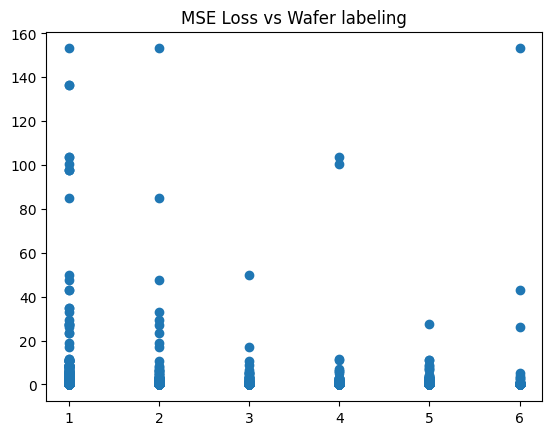

In [154]:
plt.title('MSE Loss vs Wafer labeling')
plt.scatter(test_label.numpy(),torch.mean((test_pred-test[:,0:48])**2,dim=1).detach().numpy())
plt.show()

In [85]:
AE_MSE(model_1(dt_1[-size_test:,0:49]),dt_1[-size_test:,0:48])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10000x49 and 48x150)

In [51]:
# fine-tune autoencoder
#batch 500

lr = 0.0005
# model_2 = Naive_DAE([48,100,16])

optimizer = optim.Adam(model_2.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d2_flat):
        model_2.train()
        data = data_list[0]
        v_pred = model_2(data)
        
        batch_loss = loss(data, v_pred,epoch) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_2[-size_test:,0:48]
    model_2.eval()
    test_pred = model_2(data_test)
    batch_test = loss(data_test, test_pred,epoch)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_2.eval()
AE_Stats.gen_all_stats(model_2(dt_2[-size_test:,0:48]),dt_2[-size_test:,0:48],dt_2[-size_test:])


Epoch 0, lr 0.0005
Epoch 0: Train 4.80012413488494, Test 3.487598419189453
Epoch 1, lr 0.0005
Epoch 1: Train 3.996884008049965, Test 7.200776100158691
Epoch 2, lr 0.0005
Epoch 2: Train 4.082980652120378, Test 10.420368194580078
Epoch 3, lr 0.0005
Epoch 3: Train 4.19780403441853, Test 12.20702075958252
Epoch 4, lr 0.0005
Epoch 4: Train 4.324135355088446, Test 14.240482330322266
Epoch 5, lr 0.0005
Epoch 5: Train 4.430636722710397, Test 20.515111923217773
Epoch 6, lr 0.0005
Epoch 6: Train 4.561690212355719, Test 20.897153854370117
Epoch 7, lr 0.0005
Epoch 7: Train 4.700443849100007, Test 23.10555076599121
Epoch 8, lr 0.0005
Epoch 8: Train 4.854010098112954, Test 26.799903869628906
Epoch 9, lr 0.0005
Epoch 9: Train 4.944173003964954, Test 27.193540573120117
Epoch 10, lr 0.0005
Epoch 10: Train 5.107640929884381, Test 26.127931594848633
Epoch 11, lr 0.00025
Epoch 11: Train 5.283659837113486, Test 27.847822189331055
Epoch 12, lr 0.00025
Epoch 12: Train 4.290970435738563, Test 21.9115276336669

KeyboardInterrupt: 

Epoch 0, lr 0.0045
Epoch 0: Train 16.81149677180499, Test 7.8546977043151855
Epoch 1, lr 0.0045
Epoch 1: Train 7.692528384640813, Test 4.572861671447754
Epoch 2, lr 0.0045
Epoch 2: Train 6.603563691884279, Test 5.31624174118042
Epoch 3, lr 0.0045
Epoch 3: Train 6.387289932109415, Test 4.073068141937256
Epoch 4, lr 0.0045
Epoch 4: Train 4.264073248848319, Test 3.3724684715270996
Epoch 5, lr 0.0045
Epoch 5: Train 3.9999475181400777, Test 3.307859420776367
Epoch 6, lr 0.0045
Epoch 6: Train 4.544480747625232, Test 3.3750410079956055
Epoch 7, lr 0.0045
Epoch 7: Train 3.906534229323268, Test 3.2375285625457764
Epoch 8, lr 0.0045
Epoch 8: Train 4.47968880905211, Test 3.478660821914673
Epoch 9, lr 0.0045
Epoch 9: Train 3.1091240982711317, Test 4.260379791259766
Epoch 10, lr 0.0045
Epoch 10: Train 5.955574777200818, Test 4.555392742156982
Epoch 11, lr 0.0045
Epoch 11: Train 3.798751735717058, Test 2.7547109127044678
Epoch 12, lr 0.0045
Epoch 12: Train 3.474640875466168, Test 2.9726381301879883


Epoch 103, lr 0.001125
Epoch 103: Train 1.1380308726020156, Test 1.0910074710845947
Epoch 104, lr 0.001125
Epoch 104: Train 1.165995085980743, Test 1.1160002946853638
Epoch 105, lr 0.001125
Epoch 105: Train 1.1544329214468598, Test 1.1376339197158813
Epoch 106, lr 0.001125
Epoch 106: Train 1.1673094943016769, Test 1.145242691040039
Epoch 107, lr 0.001125
Epoch 107: Train 1.1511300425566733, Test 1.1232017278671265
Epoch 108, lr 0.001125
Epoch 108: Train 1.149112325038761, Test 1.1034696102142334
Epoch 109, lr 0.001125
Epoch 109: Train 1.1403744110055267, Test 1.1027381420135498
Epoch 110, lr 0.001125
Epoch 110: Train 1.139788272343576, Test 1.0908437967300415
Epoch 111, lr 0.001125
Epoch 111: Train 1.1340283218063414, Test 1.1053895950317383
Epoch 112, lr 0.001125
Epoch 112: Train 1.1318162166178227, Test 1.084991216659546
Epoch 113, lr 0.001125
Epoch 113: Train 1.1339596675634385, Test 1.1022509336471558
Epoch 114, lr 0.001125
Epoch 114: Train 1.1236035619899631, Test 1.10109066963195

Epoch 201, lr 0.0005625
Epoch 201: Train 0.9427619067393244, Test 0.8876761794090271
Epoch 202, lr 0.0005625
Epoch 202: Train 0.9344997578561306, Test 0.8757497072219849
Epoch 203, lr 0.0005625
Epoch 203: Train 0.928154713574797, Test 0.8766656517982483
Epoch 204, lr 0.0005625
Epoch 204: Train 0.9194094486124813, Test 0.8710822463035583
Epoch 205, lr 0.0005625
Epoch 205: Train 0.919294355660677, Test 0.8600199222564697
Epoch 206, lr 0.0005625
Epoch 206: Train 0.9146548427268862, Test 0.8664423823356628
Epoch 207, lr 0.00028125
Epoch 207: Train 0.9145727822296321, Test 0.8608943223953247
Epoch 208, lr 0.00028125
Epoch 208: Train 0.8793265684917569, Test 0.8297363519668579
Epoch 209, lr 0.00028125
Epoch 209: Train 0.8792463162094355, Test 0.8283149600028992
Epoch 210, lr 0.00028125
Epoch 210: Train 0.8784592993333936, Test 0.8280824422836304
Epoch 211, lr 0.00028125
Epoch 211: Train 0.877924481280148, Test 0.8276137709617615
Epoch 212, lr 0.00028125
Epoch 212: Train 0.8768989324979484, T

Epoch 296, lr 7.03125e-05
Epoch 296: Train 0.8314234202355146, Test 0.7869911193847656
Epoch 297, lr 7.03125e-05
Epoch 297: Train 0.8312347138114273, Test 0.7868638634681702
Epoch 298, lr 7.03125e-05
Epoch 298: Train 0.8311201992258429, Test 0.786827802658081
Epoch 299, lr 7.03125e-05
Epoch 299: Train 0.8309640415795148, Test 0.7866306900978088
Epoch 300, lr 7.03125e-05
Epoch 300: Train 0.8308214993998408, Test 0.7864791750907898
Epoch 301, lr 7.03125e-05
Epoch 301: Train 0.8306599354036153, Test 0.7863219976425171
Epoch 302, lr 7.03125e-05
Epoch 302: Train 0.8305387926138937, Test 0.7862482070922852
Epoch 303, lr 7.03125e-05
Epoch 303: Train 0.8304366587772966, Test 0.7861554026603699
Epoch 304, lr 7.03125e-05
Epoch 304: Train 0.8303317486681044, Test 0.7861098647117615
Epoch 305, lr 7.03125e-05
Epoch 305: Train 0.830240716688335, Test 0.7859503626823425
Epoch 306, lr 7.03125e-05
Epoch 306: Train 0.8301040477193892, Test 0.7857944965362549
Epoch 307, lr 7.03125e-05
Epoch 307: Train 0.

Epoch 391, lr 7.03125e-05
Epoch 391: Train 0.8265643944703043, Test 0.7822308540344238
Epoch 392, lr 7.03125e-05
Epoch 392: Train 0.8266102041602135, Test 0.7822814583778381
Epoch 393, lr 7.03125e-05
Epoch 393: Train 0.8265418813489378, Test 0.7821950316429138
Epoch 394, lr 7.03125e-05
Epoch 394: Train 0.8265630772188306, Test 0.7822359800338745
Epoch 395, lr 7.03125e-05
Epoch 395: Train 0.8265023567341268, Test 0.782172679901123
Epoch 396, lr 7.03125e-05
Epoch 396: Train 0.8265101013034583, Test 0.7821618914604187
Epoch 397, lr 7.03125e-05
Epoch 397: Train 0.8265032482035458, Test 0.7821459770202637
Epoch 398, lr 7.03125e-05
Epoch 398: Train 0.8264540774635971, Test 0.7821075320243835
Epoch 399, lr 7.03125e-05
Epoch 399: Train 0.8265575877726078, Test 0.7821924090385437
Epoch 400, lr 7.03125e-05
Epoch 400: Train 0.8264367104321718, Test 0.7821089625358582
Epoch 401, lr 7.03125e-05
Epoch 401: Train 0.8264574806429446, Test 0.7821494340896606
Epoch 402, lr 7.03125e-05
Epoch 402: Train 0

Epoch 486, lr 7.03125e-05
Epoch 486: Train 0.8249529479369521, Test 0.7804924845695496
Epoch 487, lr 7.03125e-05
Epoch 487: Train 0.8248860721848905, Test 0.7804831266403198
Epoch 488, lr 7.03125e-05
Epoch 488: Train 0.8250531583279371, Test 0.780480682849884
Epoch 489, lr 7.03125e-05
Epoch 489: Train 0.8249307731539011, Test 0.7804540395736694
Epoch 490, lr 7.03125e-05
Epoch 490: Train 0.824890690330416, Test 0.7804635763168335
Epoch 491, lr 7.03125e-05
Epoch 491: Train 0.8250185594037175, Test 0.7804021239280701
Epoch 492, lr 7.03125e-05
Epoch 492: Train 0.824885212186724, Test 0.7804335951805115
Epoch 493, lr 7.03125e-05
Epoch 493: Train 0.8248947697132826, Test 0.7803347706794739
Epoch 494, lr 7.03125e-05
Epoch 494: Train 0.8248029377125203, Test 0.7803451418876648
Epoch 495, lr 7.03125e-05
Epoch 495: Train 0.8248323260471225, Test 0.7803105115890503
Epoch 496, lr 7.03125e-05
Epoch 496: Train 0.8248650389909744, Test 0.7803332209587097
Epoch 497, lr 7.03125e-05
Epoch 497: Train 0.8

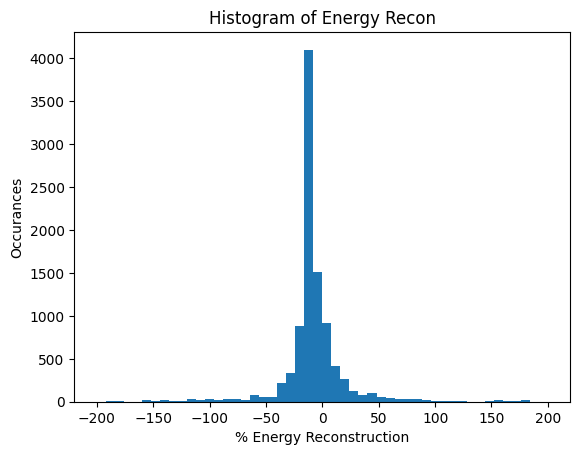

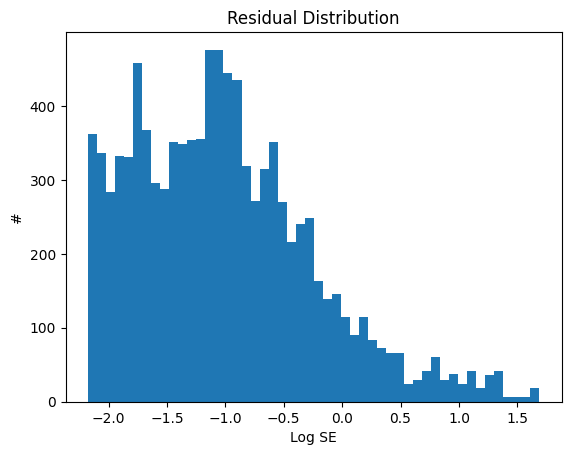

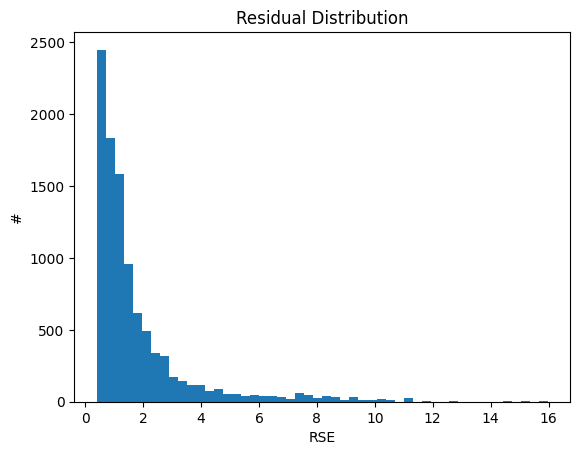

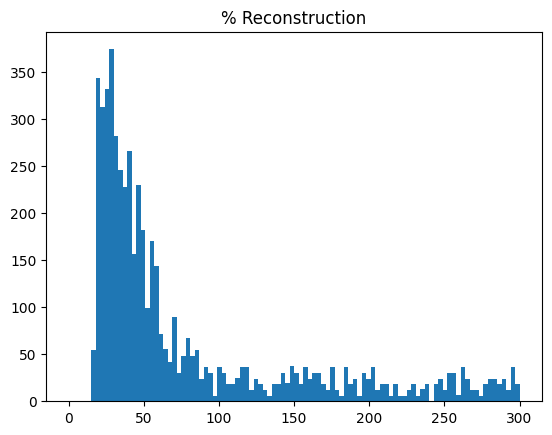

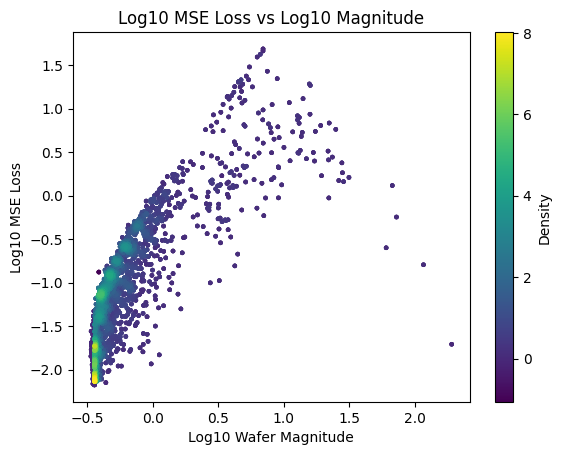

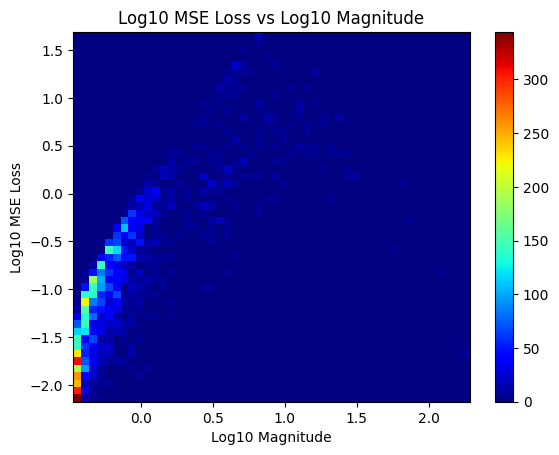

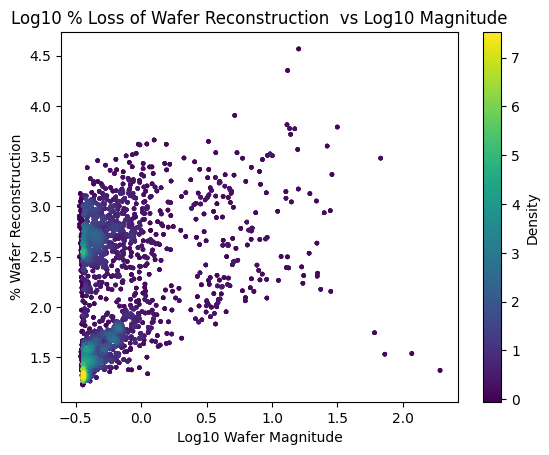

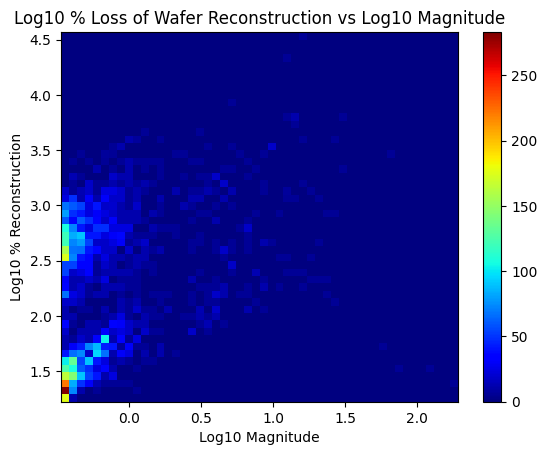

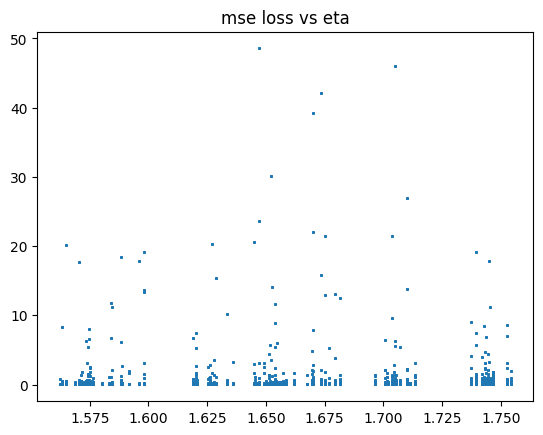

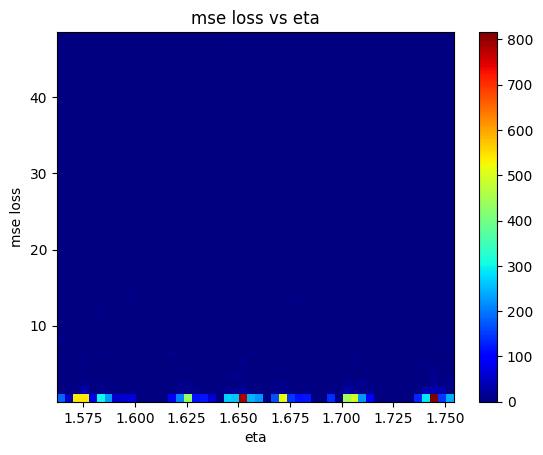

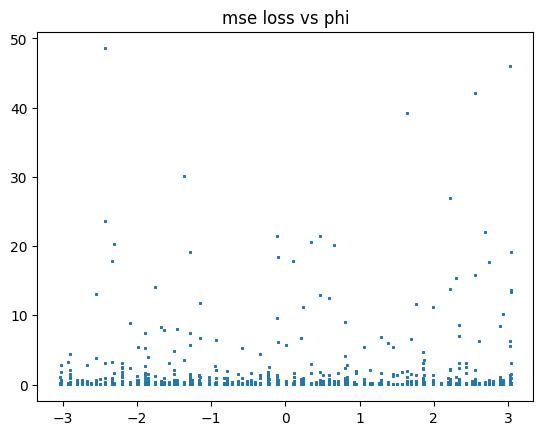

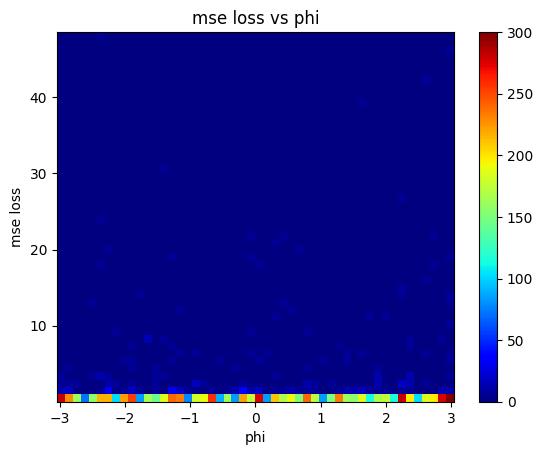

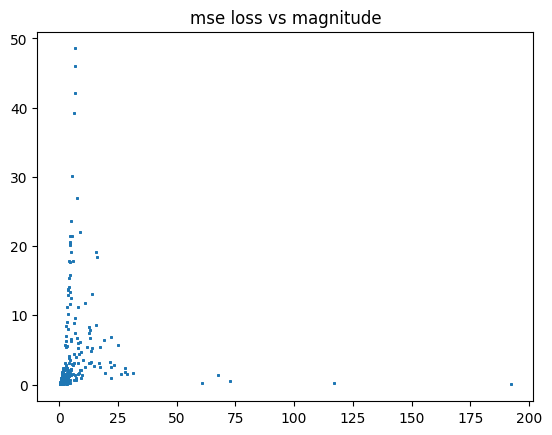

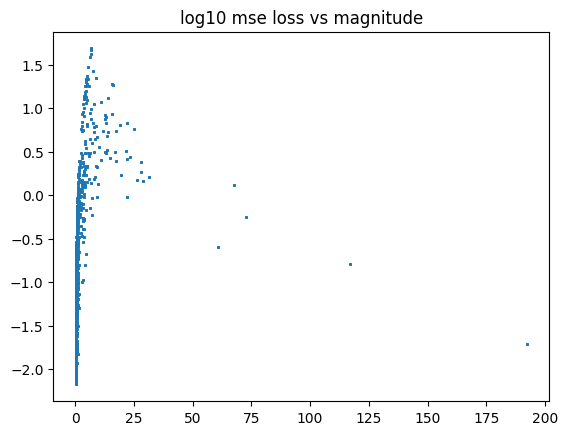

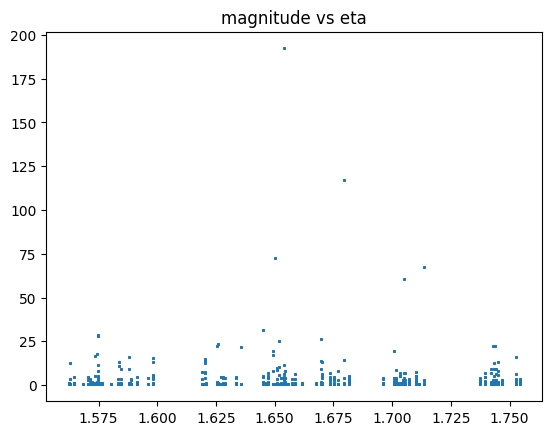

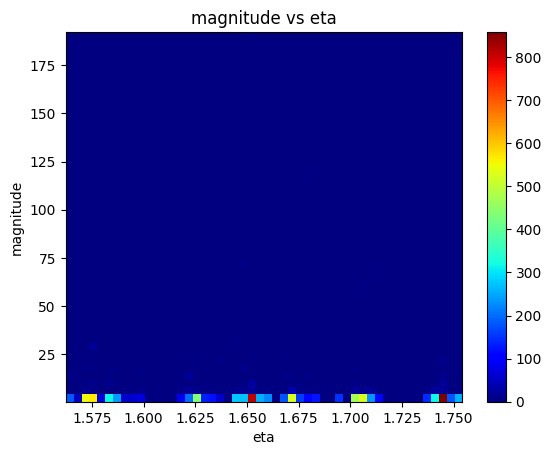

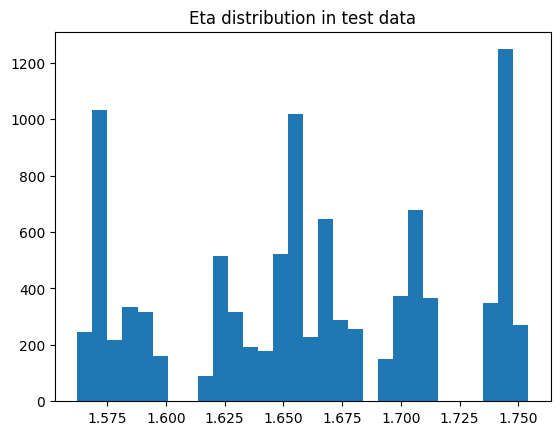

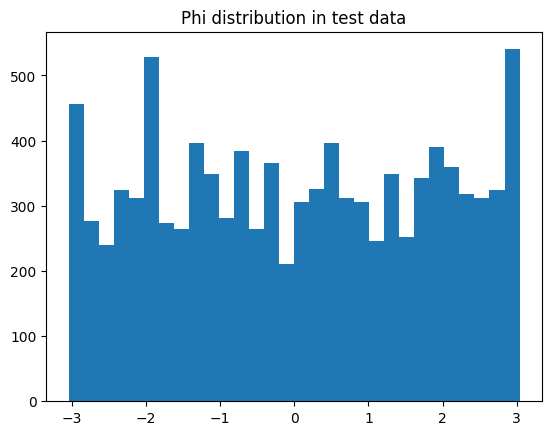

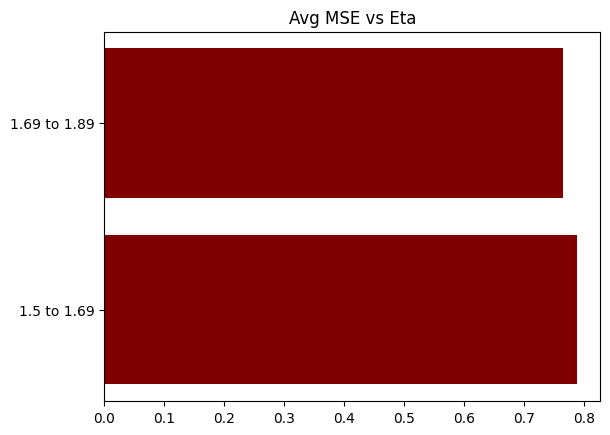

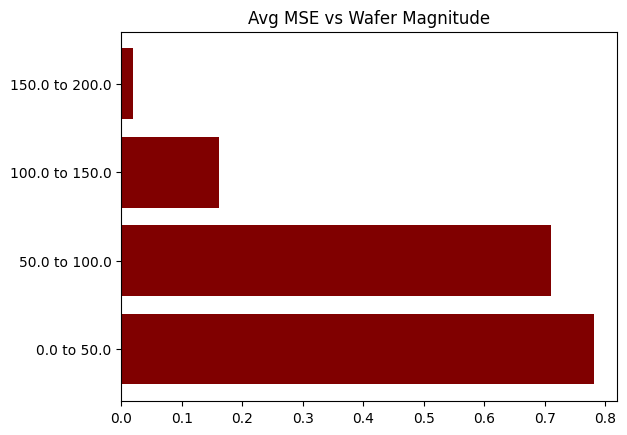

tensor([[ 1.5802, -2.6273,  0.3588,  0.0177,  0.6808],
        [ 1.5802, -2.6273,  0.3533,  0.0118,  0.5451],
        [ 1.5802, -2.6273,  0.8431,  0.2095,  1.6490],
        ...,
        [ 1.6256, -0.8328,  0.3762,  0.0219,  0.7070],
        [ 1.6256, -0.8328,  0.4796,  0.1208,  1.3389],
        [ 1.6256, -0.8328,  0.3576,  0.0113,  0.5711]], grad_fn=<CatBackward0>)

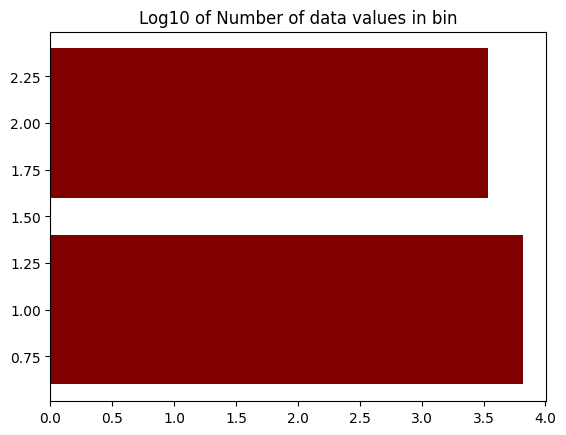

In [80]:
# fine-tune autoencoder
#batch 500


model_3 = Naive_DAE([48,100,16])

optimizer = optim.Adam(model_3.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d3_flat):
        model_3.train()
        data = data_list[0]
        v_pred = model_3(data)
        
        batch_loss = loss(data, v_pred) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_3[-size_test:,0:48]
    model_3.eval()
    test_pred = model_3(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_3.eval()
AE_Stats.gen_all_stats(model_3(dt_3[-size_test:,0:48]),dt_3[-size_test:,0:48],dt_3[-size_test:])


In [83]:
stat_3 = [model_3(dt_3[-size_test:,0:48]),dt_3[-size_test:,0:48]]

In [31]:
import numpy as np
from scipy.stats import binned_statistic
import torch
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax